# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option('display.max_colwidth', None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()


{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.158432,0.033376,0.095279
1,2020-01-02,0.767097,0.371422,0.117857
2,2020-01-03,0.190846,0.589745,0.027759
3,2020-01-04,0.304984,0.012680,0.610219
4,2020-01-05,0.992202,0.041076,0.034983


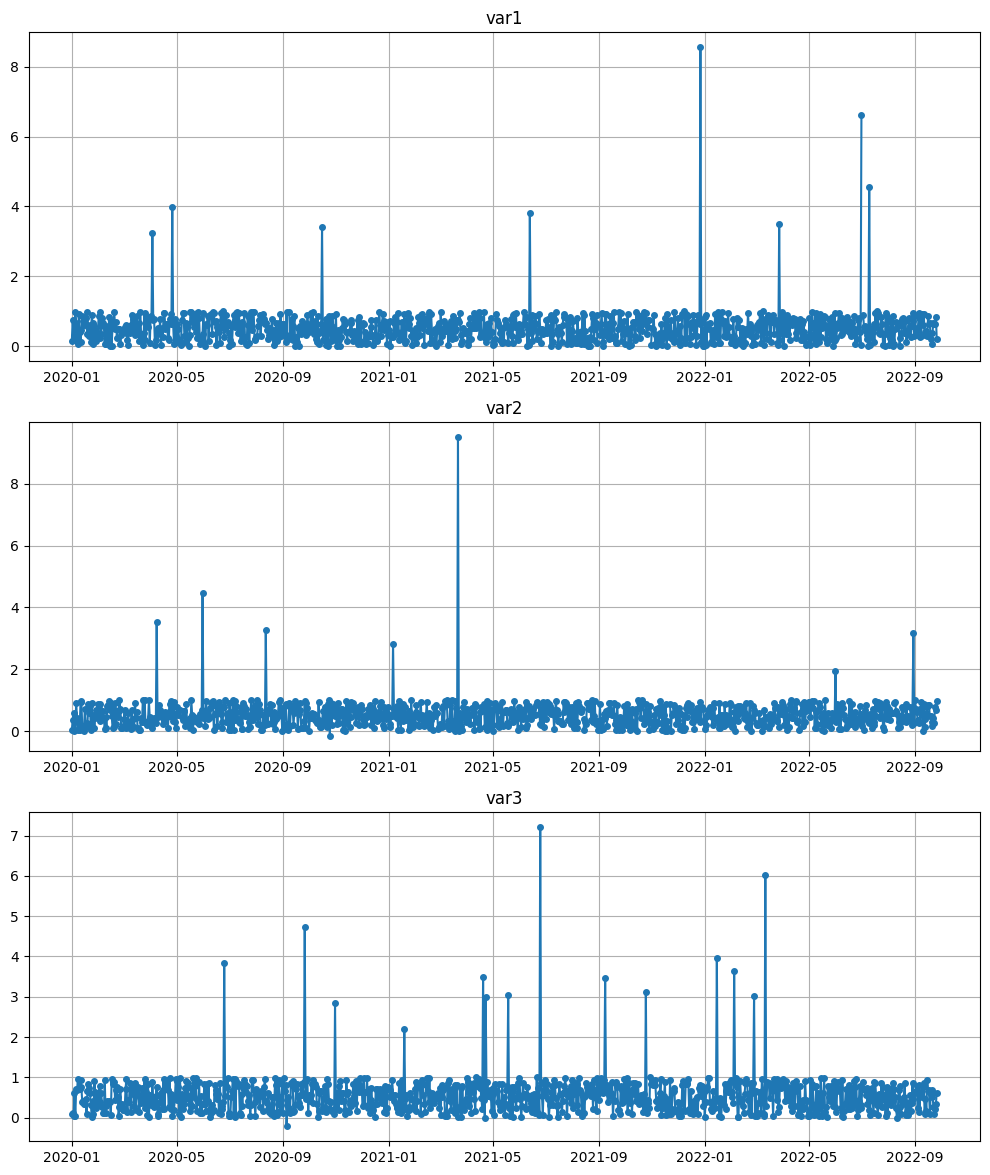

In [3]:
# plot the data
plot_df(df)

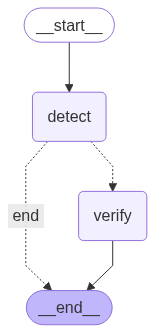

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.graph.compile().get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)


{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-04-03', variable_value=3.247699, anomaly_description='Significantly higher than any previous values in the dataset.'), Anomaly(timestamp='2020-04-26', variable_value=3.993001, anomaly_description='Significantly higher than any previous values in the dataset.'), Anomaly(timestamp='2021-06-13', variable_value=3.827001, anomaly_description='Significantly higher than any previous values in the dataset.'), Anomaly(timestamp='2022-07-01', variable_value=6.60867, anomaly_description='Significantly higher than any previous values in the dataset.'), Anomaly(timestamp='2022-07-10', variable_value=4.56223, anomaly_description='Significantly higher than any previous values in the dataset.'), Anomaly(timestamp='2021-12-27', variable_value=8.552837, anomaly_description='Significantly higher than any previous values in the dataset.')]), 'var2': AnomalyList(anomalies=[Anomaly(timestamp='2020-04-08', variable_value=3.51443, anomaly_description='Si

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.head()

,timestamp,variable_name,value,anomaly_description
0,2020-04-03,var1,3.247699,Significantly higher than any previous values in the dataset.
1,2020-04-26,var1,3.993001,Significantly higher than any previous values in the dataset.
2,2021-06-13,var1,3.827001,Significantly higher than any previous values in the dataset.
3,2022-07-01,var1,6.608670,Significantly higher than any previous values in the dataset.
4,2022-07-10,var1,4.562230,Significantly higher than any previous values in the dataset.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")

df_anomalies_wide.head()


,timestamp,var1,var2,var3
0,2020-04-03,3.247699,NaN,NaN
1,2020-04-26,3.993001,NaN,NaN
2,2021-06-13,3.827001,NaN,NaN
3,2022-07-01,6.608670,NaN,NaN
4,2022-07-10,4.562230,NaN,NaN


In [8]:
# merge anomalies with original data
df_final = df.merge(df_anomalies_wide, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final.head()


,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag
0,2020-01-01,0.158432,0.033376,0.095279,NaN,NaN,NaN
1,2020-01-02,0.767097,0.371422,0.117857,NaN,NaN,NaN
2,2020-01-03,0.190846,0.589745,0.027759,NaN,NaN,NaN
3,2020-01-04,0.304984,0.012680,0.610219,NaN,NaN,NaN
4,2020-01-05,0.992202,0.041076,0.034983,NaN,NaN,NaN


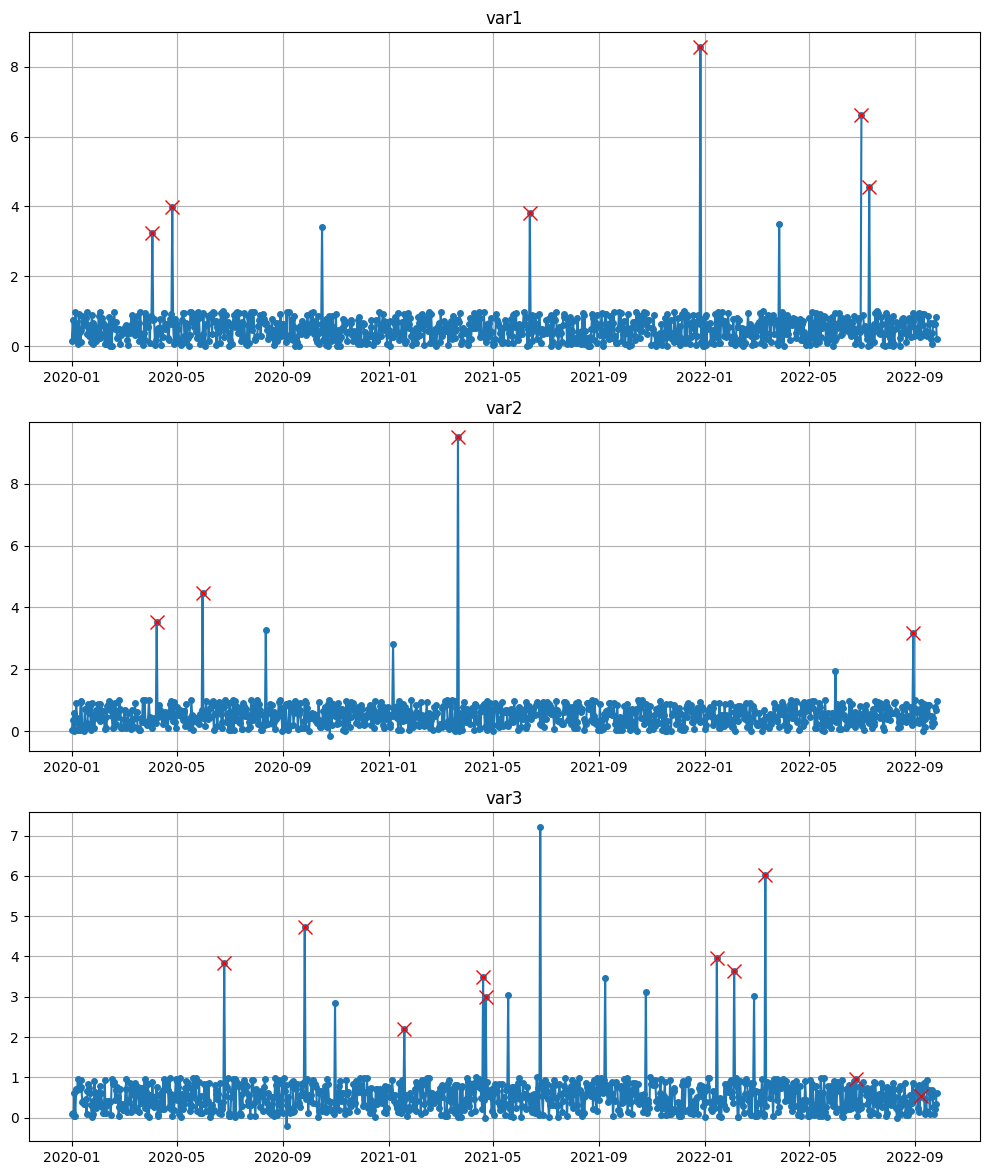

In [9]:
# plot final data with anomalies
plot_df(df_final)